
# Data Loading, Storage, and File Formats


* Topic Reading and Writing Data in Text Format  
Parsing functions in pandas  

* read_csv = load delimited data from a file, URL, or file-like   
object; use comma as default delimiter
* read_excel = Read tabular data from an Excel XLS or XLSX file
* read_html = Read all tables found in the given HTML document


# common options in these functions  


* Indexing  
Can treat one or more columns as the returned DataFrame, and whether to get
column names from the file, the user, or not at all.  
  
  
* Type inference and data conversion  
This includes the user-defined value conversions and custom list of missing value
markers.
  
  
* Datetime parsing  
Includes combining capability, including combining date and time information
spread over multiple columns into a single column in the result.  


* Iterating  
Support for iterating over chunks of very large files.  
  
  
* Unclean data issues  
Skipping rows or a footer, comments, or other minor things like numeric data with thousands separated by commas.


download examples folder from our provide link or book resources

# loading it into pandas data frame


In [3]:
import pandas as pd
# sample_df= pd.read_csv("examples/sample.csv")
# print(sample_df)
#What if no column names available
#(we are removing first row)

sample_df= pd.read_csv("examples/sample.csv")
print(sample_df)
print("\n")

# we can change the column names while loading data
sample_df=pd.read_csv("examples/sample.csv",skiprows=1,
                     names=['id', 'name', 'ch', 'ph', 'en', 'math'])
print(sample_df)

  studentid         name   chimestry   physics   english   math
0       A01     arif ali          20        30        40     50
1       A02  kamran khan          30        40        50     60
2       A03   imran ali           40        50        60     70
3       A04  kashif khan          50        60        70     80


    id         name  ch  ph  en  math
0  A01     arif ali  20  30  40    50
1  A02  kamran khan  30  40  50    60
2  A03   imran ali   40  50  60    70
3  A04  kashif khan  50  60  70    80


In [8]:
# refer the book for other details like header=None  etc.

In [12]:
sample_df= pd.read_csv("examples/ex1.csv")
sample_df

,a,b,c,d,message
0,1,2,3,4,hello
1,5,6,7,8,world
2,9,10,11,12,foo


# Hierarchal Index

In [15]:
s2_df = pd.read_csv("examples/sample2.csv")
print(s2_df)
# we have to specifiy which column will be used as index
parsed = pd.read_csv("examples/sample2.csv",
                     index_col=['key1', 'key2'])
parsed
#s2_df

  key1 key2  value1  value2
0  one    a       1       2
1  one    b       3       4
2  one    c       5       6
3  one    d       7       8
4  two    a       9      10
5  two    b      11      12
6  two    c      13      14
7  two    d      15      16


value1  value2
key1 key2                
one  a          1       2
     b          3       4
     c          5       6
     d          7       8
two  a          9      10
     b         11      12
     c         13      14
     d         15      16

In [14]:
# use of other delimiter are also possible
#In some cases, a table might not have a fixed delimiter, using whitespace or some
#other pattern to separate fields
#checkout [21] and [24]

# Handling Missing Values

In [10]:
#something,a,b,c,d,message
#one,1,2,3,4,NA
#two,5,6,,8,world
#three,9,10,11,12,foo
result = pd.read_csv('examples/sample3.csv')
print(result)
result = pd.read_csv('examples/sample3.csv', na_values=['NULL'])#
print(result)
# changing data while loading in dataframe
#diconary=  column name : [source values, target value]#
# sentinels = {'message': ['foo', 'world']}
pd.read_csv('examples/sample3.csv', na_values='sentinels',)
pd.read_csv('examples/sample3.csv',index_col=['a','c'],na_values='NULL')


  something  a   b     c   d message
0       one  1   2   3.0   4     NaN
1       two  5   6   NaN   8   world
2     three  9  10  11.0  12     foo
  something  a   b     c   d message
0       one  1   2   3.0   4     NaN
1       two  5   6   NaN   8   world
2     three  9  10  11.0  12     foo


,,something,b,d,message
a,c,,,,
1,3.0,one,2,4,NaN
5,NaN,two,6,8,world
9,11.0,three,10,12,foo


Handling missing values is an important and frequently nuanced part of the file parsing process. Missing data is usually either not present (empty string) or marked by
some sentinel value. By default, pandas uses a set of commonly occurring sentinels,
such as NA and NULL

# Reading and  Text Files in Pieces

In [12]:
#Creating A sample csv/Excel file
https://www.kaggle.com/iabhishekofficial/mobile-price-classification#train.csv

SyntaxError: invalid syntax (<ipython-input-12-256e4dc09d07>, line 2)

In [11]:
#extracting selected rows from a large datasets
pd.read_csv('datasets/train.csv', nrows=200).head()


,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [27]:
#To read a file in pieces, specify a chunksize as a number of rows:
chunks = pd.read_csv('datasets/train.csv', chunksize=200)
#print(type(chunks), print(chunks) )

chunkList = []
for chunk in chunks:
	# each chunk will work as dataframe)
	#print(type(chunk), len(chunk))
    #print(chunk.head())
    chunkList.append(chunk)

len(chunkList)


10

In [30]:
data = list(open('examples/ex3.txt'))
print(data)
# use spaces (one or more ) as delimiter 
result = pd.read_table('examples/ex3.txt', sep='\s+')  # \s+ = wide space /tab spaces
result

['            A         B         C\n', 'aaa -0.264438 -1.026059 -0.619500\n', 'bbb  0.927272  0.302904 -0.032399\n', 'ccc -0.264273 -0.386314 -0.217601\n', 'ddd -0.871858 -0.348382  1.100491\n']


C:\Users\tehse\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: read_table is deprecated, use read_csv instead.
  after removing the cwd from sys.path.


,A,B,C
aaa,-0.264438,-1.026059,-0.619500
bbb,0.927272,0.302904,-0.032399
ccc,-0.264273,-0.386314,-0.217601
ddd,-0.871858,-0.348382,1.100491


In [74]:
df = pd.read_csv('examples/ex4.csv', skiprows=[0, 2, 3])
df

,a,b,c,d,message
0,1,2,3,4,hello
1,5,6,7,8,world
2,9,10,11,12,foo


In [ ]:
#Table 6-2. Some read_csv/read_table function arguments


# Writing Data to Text Format

In [78]:
data = pd.read_csv('examples/ex5.csv')
print(data)
data.to_csv('examples/out.csv')

  something  a   b     c   d message
0       one  1   2   3.0   4     NaN
1       two  5   6   NaN   8   world
2     three  9  10  11.0  12     foo


In [84]:
import numpy as np
dates = pd.date_range('1/1/2000', periods=7)
#print(dates)
ts = pd.Series(np.arange(7), index=dates)
ts
ts.to_csv("examples/tseries.csv")

# JSON Data
short for JavaScript Object Notation

In [12]:
obj = """
{"name": "Wes",
"places_lived": ["United States", "Spain", "Germany"],
"pet": null,
"siblings": [{"name": "Scott", "age": 30, "pets": ["Zeus", "Zuko"]},
{"name": "Katie", "age": 38,
"pets": ["Sixes", "Stache", "Cisco"]}]
}
"""
print(obj)
# same like dictionary
data = pd.read_json('examples/example.json')
data


{"name": "Wes",
"places_lived": ["United States", "Spain", "Germany"],
"pet": null,
"siblings": [{"name": "Scott", "age": 30, "pets": ["Zeus", "Zuko"]},
{"name": "Katie", "age": 38,
"pets": ["Sixes", "Stache", "Cisco"]}]
}



,a,b,c
0,1,2,3
1,4,5,6
2,7,8,9


# XML and HTML: Web   data loading in to dataframe

In [15]:
#conda install lxml
# conda install -c anaconda beautifulsoup4 
# htconda install -c anaconda html5lib
import pandas as pd
tables = pd.read_html('examples/fdic_failed_bank_list.html')
print(type(tables))
print(len(tables))
failures_df = tables[0]
print(type(failures_df))
print(failures_df.shape)
print(failures_df.columns)
#print(len(failures_df))
print(failures_df["City"].head())
print(failures_df["Bank Name"].head())
failures_df.head()


<class 'list'>
1
<class 'pandas.core.frame.DataFrame'>
(547, 7)
Index(['Bank Name', 'City', 'ST', 'CERT', 'Acquiring Institution',
       'Closing Date', 'Updated Date'],
      dtype='object')
0           Mulberry
1           Woodbury
2    King of Prussia
3            Memphis
4          Milwaukee
Name: City, dtype: object
0                     Allied Bank
1    The Woodbury Banking Company
2          First CornerStone Bank
3              Trust Company Bank
4      North Milwaukee State Bank
Name: Bank Name, dtype: object


,Bank Name,City,ST,CERT,Acquiring Institution,Closing Date,Updated Date
0,Allied Bank,Mulberry,AR,91,Today's Bank,"September 23, 2016","November 17, 2016"
1,The Woodbury Banking Company,Woodbury,GA,11297,United Bank,"August 19, 2016","November 17, 2016"
2,First CornerStone Bank,King of Prussia,PA,35312,First-Citizens Bank & Trust Company,"May 6, 2016","September 6, 2016"
3,Trust Company Bank,Memphis,TN,9956,The Bank of Fayette County,"April 29, 2016","September 6, 2016"
4,North Milwaukee State Bank,Milwaukee,WI,20364,First-Citizens Bank & Trust Company,"March 11, 2016","June 16, 2016"


In [109]:
# for large and complicated dataframe, try to extract
# data as series for review and analysis
# here we converted a column into a new series of date type
close_timestamps = pd.to_datetime(failures['Closing Date'])
print(type(close_timestamps),close_timestamps)

<class 'pandas.core.series.Series'> 0     2016-09-23
1     2016-08-19
2     2016-05-06
3     2016-04-29
4     2016-03-11
5     2015-10-02
6     2015-10-02
7     2015-07-10
8     2015-05-08
9     2015-02-27
10    2015-02-13
11    2015-01-23
12    2015-01-16
13    2014-12-19
14    2014-11-07
15    2014-10-24
16    2014-10-17
17    2014-07-25
18    2014-07-18
19    2014-06-27
20    2014-06-20
21    2014-06-20
22    2014-05-30
23    2014-05-23
24    2014-05-16
25    2014-04-25
26    2014-02-28
27    2014-02-28
28    2014-01-31
29    2014-01-24
         ...    
517   2008-05-09
518   2008-03-07
519   2008-01-25
520   2007-10-04
521   2007-09-28
522   2007-02-02
523   2004-06-25
524   2004-03-19
525   2004-03-12
526   2004-02-14
527   2003-11-14
528   2003-05-09
529   2003-02-07
530   2002-12-17
531   2002-11-08
532   2002-09-30
533   2002-06-27
534   2002-06-26
535   2002-03-28
536   2002-03-01
537   2002-02-07
538   2002-02-01
539   2002-01-18
540   2002-01-11
541   2001-09-07
542   2001-0

# Binary Data Formats

In [ ]:
frame = pd.read_csv('examples/ex1.csv')
frame.to_pickle('examples/frame_pickle')
pd.read_pickle('examples/frame_pickle')


In [29]:
# Using HDF5 Format
import numpy as np
frame = pd.DataFrame({'a': np.random.randn(100)})
store = pd.HDFStore('mydata.h5')
store['obj1'] = frame
store['obj1_col'] = frame['a']
print(store)
x=store.obj1
print(x.head())
# print(x.head())
print('--------------')
store.put('obj2', frame, format='table')
print(store.select('obj2', where=['index >= 10 and index <= 15']))

store.close()
# #short cut
frame.to_hdf('mydata.h5', 'obj3', format='table')
#frame = pd.read_hdf('mydata.h5', 'obj3', where=['index < 5'])
#frame.describe()

<class 'pandas.io.pytables.HDFStore'>
File path: mydata.h5

          a
0 -0.916172
1  0.390558
2  1.288700
3 -0.758237
4 -0.571932
--------------
           a
10 -0.310008
11 -0.625598
12  0.210692
13  0.475928
14  0.665908
15 -0.035323


C:\Users\tehse\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: read_table is deprecated, use read_csv instead, passing sep='\t'.
  """Entry point for launching an IPython kernel.


,order_id,quantity
count,4622.000000,4622.000000
mean,927.254868,1.075725
std,528.890796,0.410186
min,1.000000,1.000000
25%,477.250000,1.000000
50%,926.000000,1.000000
75%,1393.000000,1.000000
max,1834.000000,15.000000


# Reading Microsoft Excel Files

In [26]:
#reading
xlsx = pd.ExcelFile('examples/ex1.xlsx')
frame = pd.read_excel('examples/ex1.xlsx', 'Sheet1')
# writing
writer = pd.ExcelWriter('examples/ex2.xlsx')
frame.to_excel(writer, 'Sheet1')
writer.save()
# alternative option for single sheet
sets=frame.to_excel('examples/ex2.xlsx')


# Interacting with Web APIs

In [34]:
import requests
import numpy as np
url = 'https://api.github.com/repos/pandas-dev/pandas/issues'
resp = requests.get(url)
print(resp)
data = resp.json()
print(type(data))
# print(data)
res=pd.read_json('https://api.github.com/repos/pandas-dev/pandas/issues')
res.head()


<Response [200]>
<class 'list'>


,url,repository_url,labels_url,comments_url,events_url,html_url,id,node_id,number,title,...,assignee,assignees,milestone,comments,created_at,updated_at,closed_at,author_association,pull_request,body
0,https://api.github.com/repos/pandas-dev/pandas...,https://api.github.com/repos/pandas-dev/pandas,https://api.github.com/repos/pandas-dev/pandas...,https://api.github.com/repos/pandas-dev/pandas...,https://api.github.com/repos/pandas-dev/pandas...,https://github.com/pandas-dev/pandas/pull/30556,543837607,MDExOlB1bGxSZXF1ZXN0MzU4MDc3MjA1,30556,"DOC: Document behaviour of head(n), tail(n) fo...",...,NaN,[],None,0,2019-12-30 10:55:14+00:00,2019-12-30 10:55:14+00:00,NaT,CONTRIBUTOR,{'url': 'https://api.github.com/repos/pandas-d...,- [x] closes #30192 \r\n- [x] tests added / pa...
1,https://api.github.com/repos/pandas-dev/pandas...,https://api.github.com/repos/pandas-dev/pandas,https://api.github.com/repos/pandas-dev/pandas...,https://api.github.com/repos/pandas-dev/pandas...,https://api.github.com/repos/pandas-dev/pandas...,https://github.com/pandas-dev/pandas/issues/30555,543791405,MDU6SXNzdWU1NDM3OTE0MDU=,30555,read_csv s3 file parameter memory_map default ...,...,NaN,[],None,0,2019-12-30 08:18:05+00:00,2019-12-30 08:18:05+00:00,NaT,NONE,NaN,#### Code Sample\r\n\r\n```python\r\n# code 1\...
2,https://api.github.com/repos/pandas-dev/pandas...,https://api.github.com/repos/pandas-dev/pandas,https://api.github.com/repos/pandas-dev/pandas...,https://api.github.com/repos/pandas-dev/pandas...,https://api.github.com/repos/pandas-dev/pandas...,https://github.com/pandas-dev/pandas/pull/30554,543770718,MDExOlB1bGxSZXF1ZXN0MzU4MDIxNjQy,30554,TST: Regression testing for fixed issues,...,NaN,[],{'url': 'https://api.github.com/repos/pandas-d...,0,2019-12-30 07:00:09+00:00,2019-12-30 08:53:29+00:00,NaT,MEMBER,{'url': 'https://api.github.com/repos/pandas-d...,- [x] closes #5764\r\n- [x] closes #7883\r\n- ...
3,https://api.github.com/repos/pandas-dev/pandas...,https://api.github.com/repos/pandas-dev/pandas,https://api.github.com/repos/pandas-dev/pandas...,https://api.github.com/repos/pandas-dev/pandas...,https://api.github.com/repos/pandas-dev/pandas...,https://github.com/pandas-dev/pandas/pull/30553,543705194,MDExOlB1bGxSZXF1ZXN0MzU3OTYyNzAx,30553,TST/BUG: fix incorrectly-passing Exception in ...,...,NaN,[],None,0,2019-12-30 03:23:00+00:00,2019-12-30 08:23:28+00:00,NaT,MEMBER,{'url': 'https://api.github.com/repos/pandas-d...,A `raise` is indented one indent further than ...
4,https://api.github.com/repos/pandas-dev/pandas...,https://api.github.com/repos/pandas-dev/pandas,https://api.github.com/repos/pandas-dev/pandas...,https://api.github.com/repos/pandas-dev/pandas...,https://api.github.com/repos/pandas-dev/pandas...,https://github.com/pandas-dev/pandas/issues/30552,543610762,MDU6SXNzdWU1NDM2MTA3NjI=,30552,PERF: groupby with many empty groups memory bl...,...,NaN,[],None,1,2019-12-29 22:59:51+00:00,2019-12-30 09:39:13+00:00,NaT,MEMBER,NaN,Suppose we have a Categorical with many unused...


In [38]:
# data_dict = data[0]
# print(data_dict['title'])
issues = pd.DataFrame(data, 
                    columns=['number', 'title','labels', 'state'])

print(issues.head())
display(issues[['number', 'title']].head())
issues.head()

   number                                              title  \
0   30556  DOC: Document behaviour of head(n), tail(n) fo...   
1   30555  read_csv s3 file parameter memory_map default ...   
2   30554           TST: Regression testing for fixed issues   
3   30553  TST/BUG: fix incorrectly-passing Exception in ...   
4   30552  PERF: groupby with many empty groups memory bl...   

                                              labels state  
0                                                 []  open  
1                                                 []  open  
2  [{'id': 127685, 'node_id': 'MDU6TGFiZWwxMjc2OD...  open  
3  [{'id': 76811, 'node_id': 'MDU6TGFiZWw3NjgxMQ=...  open  
4  [{'id': 78527356, 'node_id': 'MDU6TGFiZWw3ODUy...  open  


,number,title
0,30556,"DOC: Document behaviour of head(n), tail(n) fo..."
1,30555,read_csv s3 file parameter memory_map default ...
2,30554,TST: Regression testing for fixed issues
3,30553,TST/BUG: fix incorrectly-passing Exception in ...
4,30552,PERF: groupby with many empty groups memory bl...


,number,title,labels,state
0,30556,"DOC: Document behaviour of head(n), tail(n) fo...",[],open
1,30555,read_csv s3 file parameter memory_map default ...,[],open
2,30554,TST: Regression testing for fixed issues,"[{'id': 127685, 'node_id': 'MDU6TGFiZWwxMjc2OD...",open
3,30553,TST/BUG: fix incorrectly-passing Exception in ...,"[{'id': 76811, 'node_id': 'MDU6TGFiZWw3NjgxMQ=...",open
4,30552,PERF: groupby with many empty groups memory bl...,"[{'id': 78527356, 'node_id': 'MDU6TGFiZWw3ODUy...",open


In [ ]:
#Interacting with Databases


In [35]:
#conda install -c anaconda sqlite 


import sqlite3

#creating table
query = """ CREATE TABLE test(a VARCHAR(20), 
        b VARCHAR(20),c REAL,
        d INTEGER);  """
con = sqlite3.connect('mydata.sqlite')
con.execute(query)
con.commit()


OperationalError: table test already exists

In [36]:
# inserting data
data = [('Atlanta', 'Georgia', 1.25, 6),
        ('Tallahassee', 'Florida', 2.6, 3),
        ('Sacramento', 'California', 1.7, 5)
       ]
stmt = "INSERT INTO test VALUES(?, ?, ?, ?)"
con.executemany(stmt, data)
con.commit()

<class 'list'> [('Atlanta', 'Georgia', 1.25, 6), ('Tallahassee', 'Florida', 2.6, 3), ('Sacramento', 'California', 1.7, 5)]


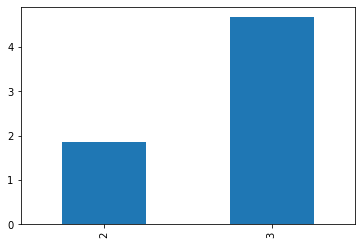

In [45]:
#selecting/extracting data
cursor = con.execute('select * from test')
rows = cursor.fetchall()
print(type(rows), rows)
rows
frame = pd.DataFrame(rows)
frame.describe()
%matplotlib inline
frame.mean().plot(kind='bar')

In [60]:
print(cursor.description)
data_df = pd.DataFrame(rows, columns=[x[0] for x in cursor.description])
data_df

(('a', None, None, None, None, None, None), ('b', None, None, None, None, None, None), ('c', None, None, None, None, None, None), ('d', None, None, None, None, None, None))


,a,b,c,d
0,Atlanta,Georgia,1.25,6
1,Tallahassee,Florida,2.60,3
2,Sacramento,California,1.70,5


In [62]:
#conda install -c anaconda sqlalchemy 
# using sqlalchemy 
import sqlalchemy as sqla
db = sqla.create_engine('sqlite:///mydata.sqlite')
pd.read_sql('select * from test', db)

,a,b,c,d
0,Atlanta,Georgia,1.25,6
1,Tallahassee,Florida,2.60,3
2,Sacramento,California,1.70,5


In [ ]:
#end of six chapter